In [26]:
from tensorflow import keras
from tensorflow.keras import layers

# This is the size of our encoded representations
encoding_dim = 1  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [27]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [28]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
from keras.datasets import mnist
import numpy
(x_train, _), (x_test, _) = mnist.load_data()

In [31]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), numpy.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), numpy.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [32]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.4281 - val_loss: 0.2894
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2810 - val_loss: 0.2739
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2715 - val_loss: 0.2682
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2672 - val_loss: 0.2652
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2645 - val_loss: 0.2631
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2627 - val_loss: 0.2616
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2613 - val_loss: 0.2606
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2603 - val_loss: 0.2596
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2594 - val_loss: 0.2588
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2587 - val_loss: 0.2583

In [33]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


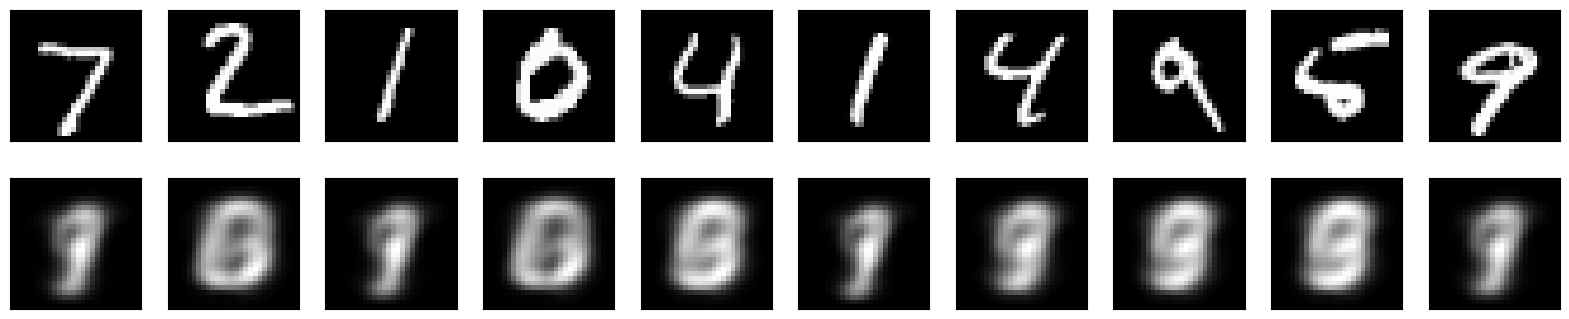

In [34]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as pyplot

n = 10  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [35]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [36]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [37]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2893 - val_loss: 0.1965
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1779 - val_loss: 0.1616
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1530 - val_loss: 0.1430
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1385 - val_loss: 0.1319
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1291 - val_loss: 0.1243
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1224 - val_loss: 0.1182
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1172 - val_loss: 0.1138
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1134 - val_loss: 0.1106
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1107 - val_loss: 0.1085
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1089 - val_loss: 0.1070

313/313 [==============================] - 0s 1ms/step


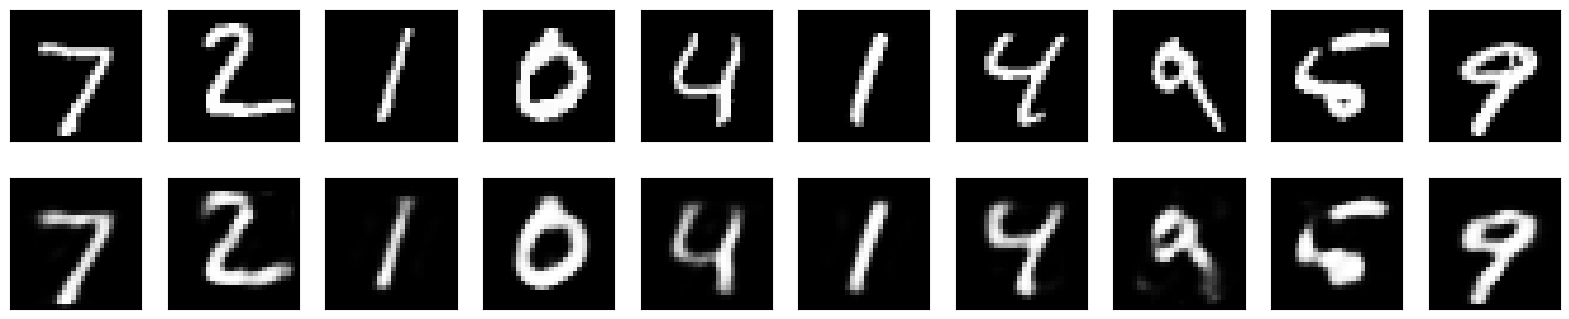

In [38]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [39]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [40]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2490 - val_loss: 0.1658
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1494 - val_loss: 0.1361
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1306 - val_loss: 0.1238
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1211 - val_loss: 0.1164
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1159 - val_loss: 0.1124
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1123 - val_loss: 0.1093
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1092 - val_loss: 0.1064
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1065 - val_loss: 0.1041
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1042 - val_loss: 0.1019
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1022 - val

313/313 [==============================] - 1s 1ms/step


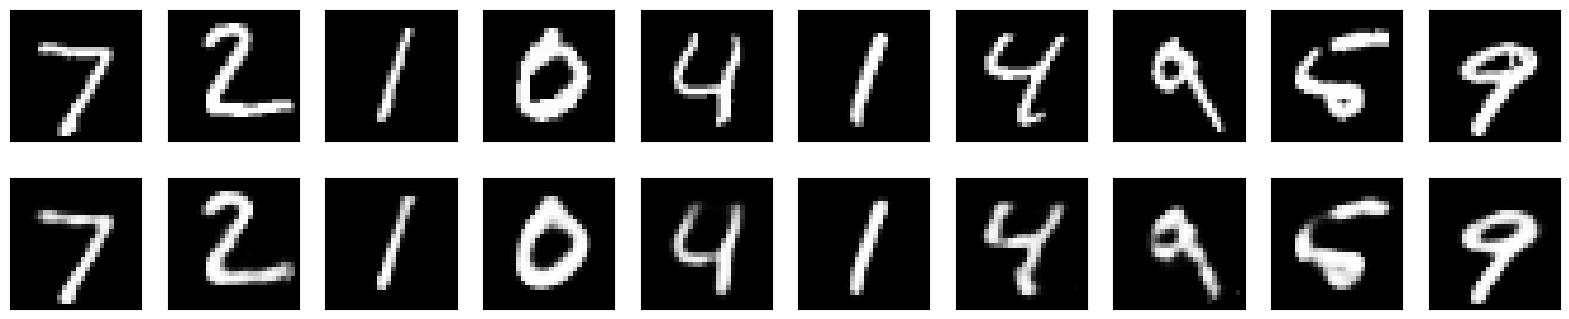

In [41]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [43]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = numpy.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = numpy.reshape(x_test, (len(x_test), 28, 28, 1))

In [46]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),)

Epoch 1/50
469/469 [==============================] - 49s 101ms/step - loss: 0.2087 - val_loss: 0.1437
Epoch 2/50
469/469 [==============================] - 46s 98ms/step - loss: 0.1349 - val_loss: 0.1268
Epoch 3/50
469/469 [==============================] - 46s 97ms/step - loss: 0.1240 - val_loss: 0.1192
Epoch 4/50
469/469 [==============================] - 50s 107ms/step - loss: 0.1182 - val_loss: 0.1152
Epoch 5/50
469/469 [==============================] - 50s 107ms/step - loss: 0.1144 - val_loss: 0.1112
Epoch 6/50
469/469 [==============================] - 49s 104ms/step - loss: 0.1114 - val_loss: 0.1087
Epoch 7/50
469/469 [==============================] - 45s 96ms/step - loss: 0.1093 - val_loss: 0.1071
Epoch 8/50
469/469 [==============================] - 42s 90ms/step - loss: 0.1076 - val_loss: 0.1055
Epoch 9/50
469/469 [==============================] - 42s 89ms/step - loss: 0.1063 - val_loss: 0.1045
Epoch 10/50
469/469 [==============================] - 41s 87ms/step - loss: 0

313/313 [==============================] - 4s 12ms/step


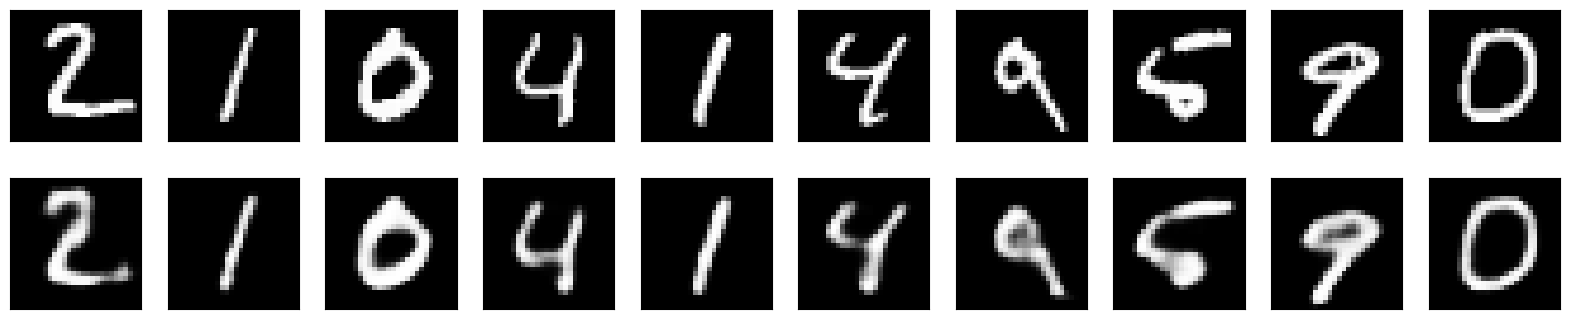

In [47]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
pyplot.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = pyplot.subplot(2, n, i)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

313/313 [==============================] - 1s 3ms/step


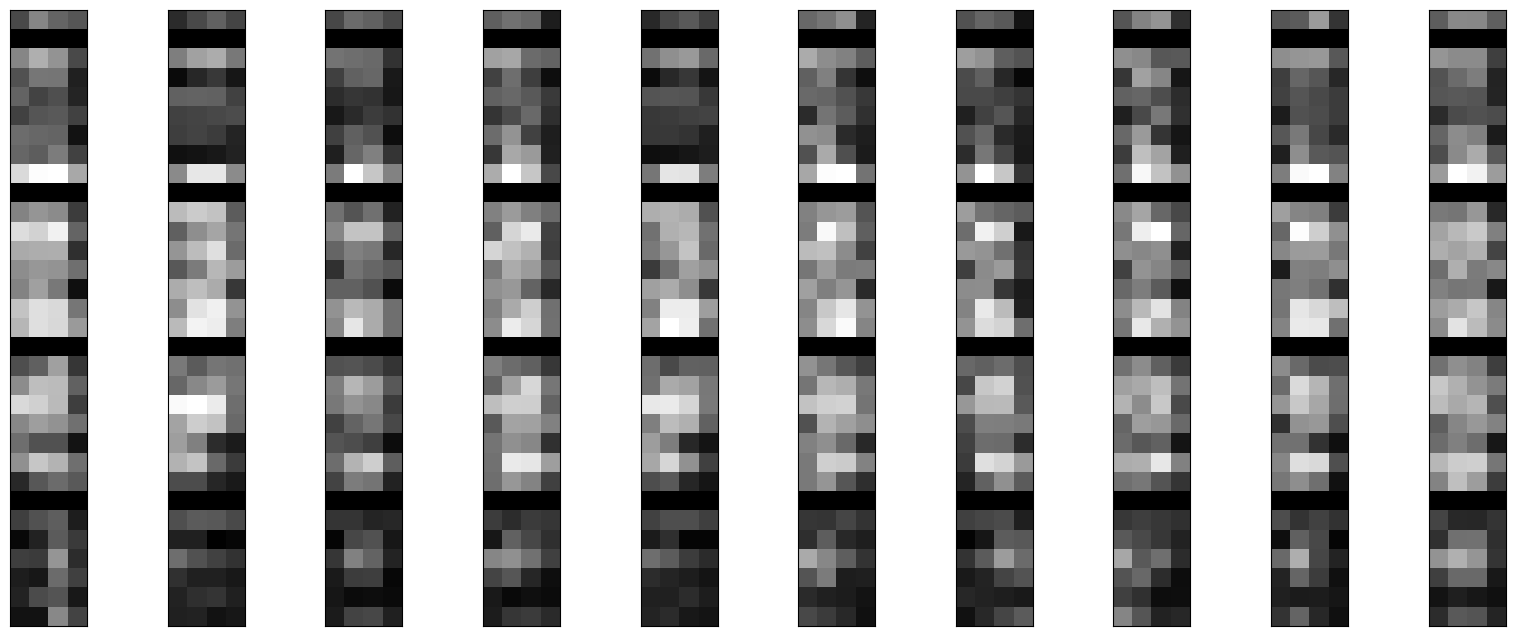

In [48]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
pyplot.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = pyplot.subplot(1, n, i)
    pyplot.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [49]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = numpy.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = numpy.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

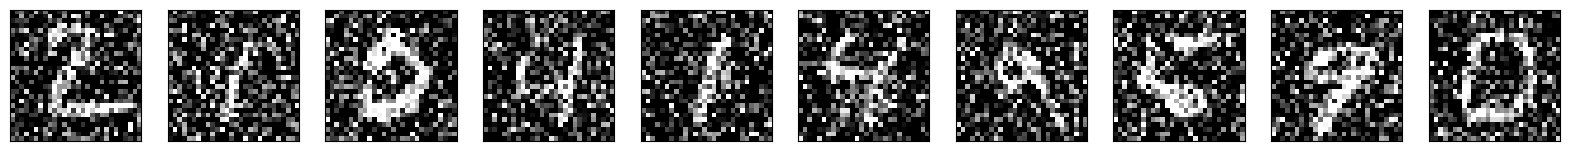

In [50]:
n = 10
pyplot.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = pyplot.subplot(1, n, i)
    pyplot.imshow(x_test_noisy[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [51]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [52]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 95s 201ms/step - loss: 0.1612 - val_loss: 0.1162
Epoch 2/100
469/469 [==============================] - 85s 182ms/step - loss: 0.1132 - val_loss: 0.1090
Epoch 3/100
469/469 [==============================] - 88s 187ms/step - loss: 0.1082 - val_loss: 0.1052
Epoch 4/100
469/469 [==============================] - 92s 196ms/step - loss: 0.1052 - val_loss: 0.1032
Epoch 5/100
469/469 [==============================] - 93s 197ms/step - loss: 0.1032 - val_loss: 0.1021
Epoch 6/100
469/469 [==============================] - 93s 198ms/step - loss: 0.1016 - val_loss: 0.1004
Epoch 7/100
469/469 [==============================] - 94s 200ms/step - loss: 0.1006 - val_loss: 0.0992
Epoch 8/100
469/469 [==============================] - 93s 198ms/step - loss: 0.0998 - val_loss: 0.0986
Epoch 9/100
469/469 [==============================] - 92s 195ms/step - loss: 0.0991 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] - 94s 200m

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
pyplot.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = pyplot.subplot(2, n, i)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [53]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [54]:
from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [55]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [56]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), numpy.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), numpy.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 186.3466 - val_loss: 167.2723
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 165.1634 - val_loss: 163.4292
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 162.2681 - val_loss: 161.1340
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 160.2209 - val_loss: 159.4255
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 158.6438 - val_loss: 157.9564
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 157.3516 - val_loss: 157.0014
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 156.3163 - val_loss: 155.9475
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 155.4188 - val_loss: 155.3367
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 154.5471 - val_loss: 154.4764
Epoch 10/100
1875/1875 [=============

In [58]:
x_test_encoded = encoder.predict(x_test, batch_size=256)
pyplot.figure(figsize=(6, 6))
pyplot.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
pyplot.colorbar()
pyplot.show()

40/40 [==============================] - 0s 3ms/step


TypeError: list indices must be integers or slices, not tuple

<Figure size 600x600 with 0 Axes>

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = numpy.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = numpy.linspace(-15, 15, n)
grid_y = numpy.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = numpy.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

pyplot.figure(figsize=(10, 10))
pyplot.imshow(figure)
pyplot.show()